# 학습 목적
1. 파이토치를 사용하여 훈련 속도를 높이는 방법
2. 파이토치의 Dataset과 DataLoader를 사용하여 입력 파이프라인과 효율적인 모델 훈련 구축하기
3. 파이토치를 사용하여 최적화된 머신 러닝 코드 작성하기
4. torch.nn 모듈을 사용하여 딥러닝 아키텍처 구성하기
5. 인공 신경망을 위해 여러 가지 활성화 함수 선택하기
----

## 12.1 파이토치와 훈련 성능
    - 계산 비용이 높은 연산을 수행할 때 마주치게 되는 하드웨어 성능 이슈 확인
    - 파이토치가 무엇인지 배우기

### 12.1.1 성능 문제

In [1]:
from IPython.display import Image as IPythonImage
%matplotlib inline

In [2]:
IPythonImage(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/figures/12_01.png', width=500)

### 12.1.2 파이토치란?
- 텐서를 스칼라, 벡터, 행렬 등 일반화 형태로 이해할 수 있음
- 스칼라는 랭크 0 / 벡터 랭크 1 텐서 / 행렬 랭크 2 텐서
- 세번째 차원으로 쌓은 행렬은 랭크 3 텐서
- 파이토치 텐서는 넘파이 배열과 비슷하지만 자동 미분을 위해 최적화되어 있고 GPU에서 실행할 수 있음

In [3]:
IPythonImage(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/figures/12_02.png', width=500)

### 12.1.3 파이토치 학습 방법
- 파이토치의 프로그래밍 방식 학습
    - 텐서를 만들고 조작하는 방법을 설명
    - 데이터를 로드하는 방법과 데이터셋을 효율적으로 순환할 수 있는 torch.utils.data 모듈을 사용하는 방법 학습
    - torch.utils.data.Dataset 모듈에 내장되어 제공하는 데이터셋에 대해 소개하고 사용하는 방법 학습
- 위 기초 사항을 배운 후 파이토치의 신경망 모듈인 torch.nn 학습.
    - 모델 구축으로 넘어가서 모델을 구성하고 훈련하는 방법법 학습
    - 디스크에 훈련된 모델을 저장하는 방법 학습

---
## 12.2 파이토치 처음 시작하기
    - 12.2.1파이토치 설치는 pass

### 12.2.2 파이토치에서 텐서 만들기

In [2]:
import torch
import numpy as np

print('파이토치 버전:', torch.__version__)

np.set_printoptions(precision=3)

파이토치 버전: 2.7.1+cpu


In [8]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [12]:
torch.is_tensor(a), torch.is_tensor(t_a)

(False, True)

In [10]:
t_ones = torch.ones(2, 3)
t_ones.shape
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [11]:
rand_tensor = torch.rand(2, 3)
print(rand_tensor)

tensor([[0.4283, 0.9605, 0.1704],
        [0.3515, 0.5470, 0.5167]])


### 12.2.3 텐서의 데이터 타입과 크기 조작
- 모델이나 연산에 맞는 입력을 준비하려면 텐서를 조작하는 방법을 배워야 함
- 텐서의 데이터 타입과 크기를 조작하는 방법 학습
- 파이토치의 to, reshape, transpose, squeeze(차원 삭제) 함수 학습

In [14]:
# torch.to() 함수: 텐서의 데이터 타입을 원하는 타입으로 바꿀 수 있음
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [18]:
# ===============================================================================
# 어떤 연산은 특정 차원(랭크)의 입력 텐서를 필요로 함 -> 차원은 원소의 크기와 관련이 있음
# 따라서, 텐서의 크기를 바꾸고 차원을 추가하거나 불필요한 차원을 제거할 수 있어야 함
# torch.transpose(), torch.reshape(), torch.squeeze()
# ===============================================================================

# 텐서 전치하기
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape) 

# 텐서 크기 바꾸기
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

# 불필요한 차원 삭제하기 (크기가 1인 차원은 불필요함)
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(t.shape, ' --> ', t_sqz.shape) 

torch.Size([3, 5])  -->  torch.Size([5, 3])
torch.Size([5, 6])
torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


### 12.2.4 텐서에 수학 연산 적용
- 원소별 곱셈, 행렬 곱셈, 텐서의 norm 연산 학습

In [22]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1 # torch.rand는 [0, 1) 범위의 균등 분포에서 뽑은 랜덤한 값으로 채워진 탠서 반환
t2 = torch.normal(mean=0, std=1, size=(5, 2))

t3 = torch.multiply(t1, t2)
print(t3)

# 특정 축을 따라 평균, 합, 표준 편차를 계산하려면
# torch.mean(), torch.sum(), torch.std()를 사용함
t4 = torch.mean(t1, axis=0)
print(t4)

# t1과 51의 행렬 곱셈은 torch.matmul() 사용
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)

# torch.linalg.norm()함수를 통해 L^p norm 계산
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)
print(norm_t1)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])
tensor([-0.1373,  0.2028])
tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])
tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])
tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


### 12.2.5 chunk(), stack(), cat() 함수
- 하나의 텐서를 여러 개의 텐서로 나누는 또는 반대인 상황을 만드는 연산 학습

In [4]:
# 분할 개수 지정하기
torch.manual_seed(1)
t = torch.rand(6)
print(t)

t_splits = torch.chunk(t, 3)
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [6]:
# 다른 분할 크기 전달하기
torch.manual_seed(1)
t = torch.rand(5)
print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [13]:
# 여러 개의 텐서를 연결하거나 쌓아서 하나의 텐서를 만들 때 - torch.stack(), torch.cat()
a = torch.ones(3)
b = torch.zeros(2)
c = torch.cat([a, b], axis = 0)
print(c)

# a = torch.ones(3)
# b = torch.zeros(3)
# c = torch.cat([a, b], axis = 1) # a와 b가 1차원 텐서이기에 2번째 축이 존재하지 않아 에러 발생
# print(c)

a = torch.ones(3)
b = torch.zeros(3)
c = torch.stack([a, b], axis = 1)
print(c)

a = torch.ones(3)
b = torch.zeros(3)
c = torch.stack([a, b], axis = 0)
print(c)

tensor([1., 1., 1., 0., 0.])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])
tensor([[1., 1., 1.],
        [0., 0., 0.]])


---
## 12.3 파이토치 입력 파이프라인 구축
    - 파이토치 Dataset과 DataLoader를 구축하여 데이터 로딩, 셔플링, 배치를 만드는 여러 가지 방법을 학습

### 12.3.1 텐서에서 파이토치 DataLoader 만들기
    - torch.tuils.data.DataLoader() 함수를 사용하여 쉽게 데이터셋을 만들 수 있음
        - DataLoader 클래스의 객체를 반환함 
        - 이 객체를 사용하여 입력 데이터셋에 있는 개별 원소를 순환시킬 수 있음

In [14]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [ ]:
# 데이터셋을 자동 배치 또는 사용자의 정의 배치로 구성할 수 있음
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'배치 {i}:', batch)

배치 1: tensor([0., 1., 2.])
배치 2: tensor([3., 4., 5.])


### 12.3.2 두 개의 텐서를 하나의 데이터셋으로 연결

In [21]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

from torch.utils.data import Dataset
class JointDataset(Dataset):
    # =====================
    # 사용자 정의 Dataset 클래스는 나중에 데이터 로더가 사용할
    #  __init__(), __getitem__() 두 메서드를 포함해야 함
    # =====================
    def __init__(self, x, y):
        # 기존 배열 읽기, 파일 로드, 데이터 필터링 등 초기화 로직이 일어나는 곳
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        # 주어진 인덱스에 해당하는 샘플을 반환함
        return self.x[idx], self.y[idx]
    

joint_dataset = JointDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0], '    y: ', example[1])    

  x:  tensor([0.7576, 0.2793, 0.4031])     y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])     y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])     y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])     y:  tensor(3)


In [ ]:
# ===================================================
# 텐서 형식의 데이터셋인 경우 사용자 정의 Dataset 클래스인 JointDataset을 사용하는 대신
# 간단하게 torch.utils.data.TensorDataset 클래스를 활용하여 
# 다음과 같이 조인트 데이터셋을 생성할 수 있음
# ===================================================
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)
for example in joint_dataset:
    print('  x: ', example[0], '    y: ', example[1])    

# 원본 특성과 레이블 사이의 원소별 대응이 깨지는 것이 일반적인 오류의 원인
# 그러나 일단 하나의 데이터셋으로 합쳐지면 이런 작업을 적용해도 안전함

  x:  tensor([0.7576, 0.2793, 0.4031])     y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])     y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])     y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])     y:  tensor(3)


### 12.3.3 셔플, 배치, 반복
    - 배치를 만드는 것 외에도 데이터셋을 섞거나 재순환하는 방법 학습

In [ ]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

# x와 y 항목 간 일대일 대응이 깨지지 않고 행이 섞여 있음
for i, batch in enumerate(data_loader, 1):
    print(f'배치 {i}:', 'x:', batch[0],
           '       \n   y:', batch[1])

배치 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]])        
   y: tensor([2, 0])
배치 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]])        
   y: tensor([1, 3])


In [ ]:
# 여러 에포크 동안 모델을 훈련할 때 데이터셋을 원하는 에포크 수만큼 섞어서 반복해야 함
for epoch in range(2):
    print(f'에포크 {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
          print(f'배치 {i}:', 'x:', batch[0],
                           '       \n   y:', batch[1])
    print('===========================================')

# 2개의 다른 배치 집합이 만들어지는 것을 확인할 수 있음

에포크 1
배치 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.4388, 0.6387, 0.5247]])        
   y: tensor([0, 3])
배치 2: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7347, 0.0293, 0.7999]])        
   y: tensor([2, 1])
에포크 2
배치 1: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]])        
   y: tensor([1, 3])
배치 2: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]])        
   y: tensor([2, 0])


### 12.3.4 로컬 디스크에 있는 파일에서 데이터셋 만들기
    - 저자가 제공하는 고양이, 강아지 사진 파일에서 데이터셋을 어떻게 만드는지 학습
    - torchvision의 transform을 사용하여 디코딩하고 이미지 크기를 바꾸는 것을 학습

In [32]:
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in
                    imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


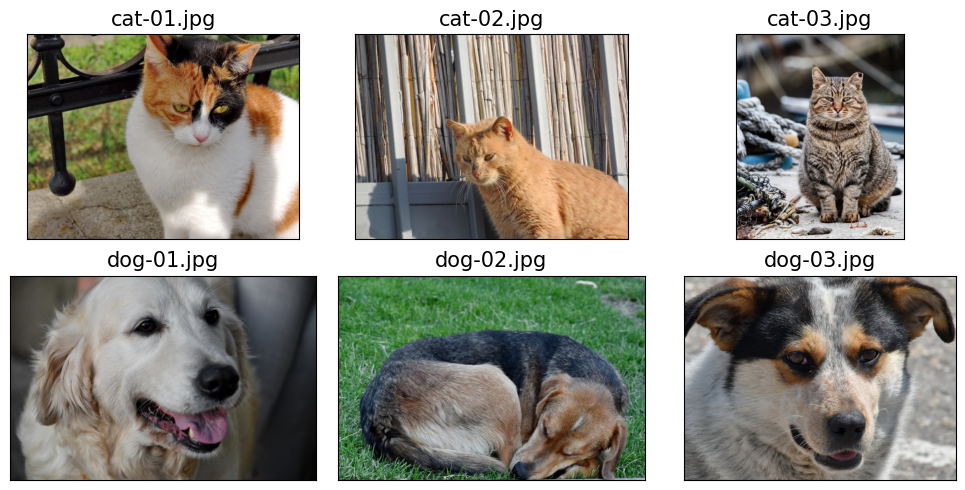

In [34]:
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10,5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

In [35]:
# 레이블 설정 - 강아지: 1 / 고양이: 0
labels = [1 if 'dog' in os.path.basename(file) else 0
                                for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [39]:
!pip install torchvision

   ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
   ---------------------------------------- 4.3/4.3 MB 37.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/113.8 MB ? eta -:--:--
   ---- ----------------------------------- 12.1/113.8 MB 58.7 MB/s eta 0:00:02
   -------- ------------------------------- 24.4/113.8 MB 59.0 MB/s eta 0:00:02
   ------------ --------------------------- 37.0/113.8 MB 59.1 MB/s eta 0:00:02
   ----------------- ---------------------- 49.5/113.8 MB 59.1 MB/s eta 0:00:02
   --------------------- ------------------ 60.0/113.8 MB 57.2 MB/s eta 0:00:01
   ------------------------- -------------- 72.6/113.8 MB 57.5 MB/s eta 0:00:01
   ----------------------------- ---------- 84.9/113.8 MB 57.8 MB/s eta 0:00:01
   ------------------------------- -------- 88.6/113.8 MB 53.2 MB/s eta 0:00:01
   ----------------------------------- ---- 99.6/113.8 MB 52.5 MB/s eta 0:00:01
   ------------------------------------- - 109.1/113.8 MB 51.7 

  You can safely remove it manually.

[notice] A new release of pip is available: 25.0.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torchvision.transforms as transforms
img_height, img_width = 80, 120
transform = transforms.Compose([
    transform.ToTensor(),
    transforms.Resize((img_height, img_width))
])

# 사용자 정의 class
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)        
        label = self.labels[index]
        return img, label
    
    def __len__(self):
        return len(self.labels)
    
image_dataset = ImageDataset(file_list, labels, transform)

fig = plt.figure(figsize=(10,6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
plt.tight_layout()
plt.show()

# =====================================================================
# ImageDataset 클래스의 __getitem__ 메서드는 원시 콘텐츠(이미지 및 레이블)를 로딩하고
# 이미지를 텐서로 디코딩하고, 이미지 크기를 조정하는 등
# 총 4개의 단계를 하나의 함수로 감쌉니다.
# 그 다음 이 함수는 데이터 로더를 통해 이전 절에서 배운 다른 연산을 적용할 수 있는 데이터셋을 반환함
# =====================================================================

RuntimeError: operator torchvision::nms does not exist

In [ ]:
# 